In [1]:
import utils as ut
import env as env
from agent import EpsilonGreedy, UCB
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from typing import Sequence
import os

plt.style.use('seaborn-v0_8-muted')

# Constants:
n_trials = 2000
n_steps = 10_000

In [2]:
def check_and_display_plots(reward_path, optimal_action_path):
    """
    Check if plots exist and display them if they do.
    Returns True if plots exist, False otherwise.
    """
    if os.path.exists(reward_path) and os.path.exists(optimal_action_path):
        print('Skipping experiment, plots already exist.')
        images = [mpimg.imread(reward_path), mpimg.imread(optimal_action_path)]
        for img in images:
            plt.figure(figsize=(20, 10))
            plt.imshow(img)
            plt.axis('off')
        plt.show()
        return True
    else:
        return False

## Goal of this Notebook
In this notebook, I will try to replicate some figures made in the book "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto. Specifically, figures 2.1-2.4 from chapter 2 "Multi-armed Bandits". 

### What does a bandit environment look like?

Below is an example of a bandit environment with 10 arms. The chart shows the reward distributions for each arm. Throughout this notebook, I will compare the performance of different bandit algorithms on 2000 randomly generated bandit environments. Each environment will have 10 arms with distributions centered at means sampled from a standard normal distribution.

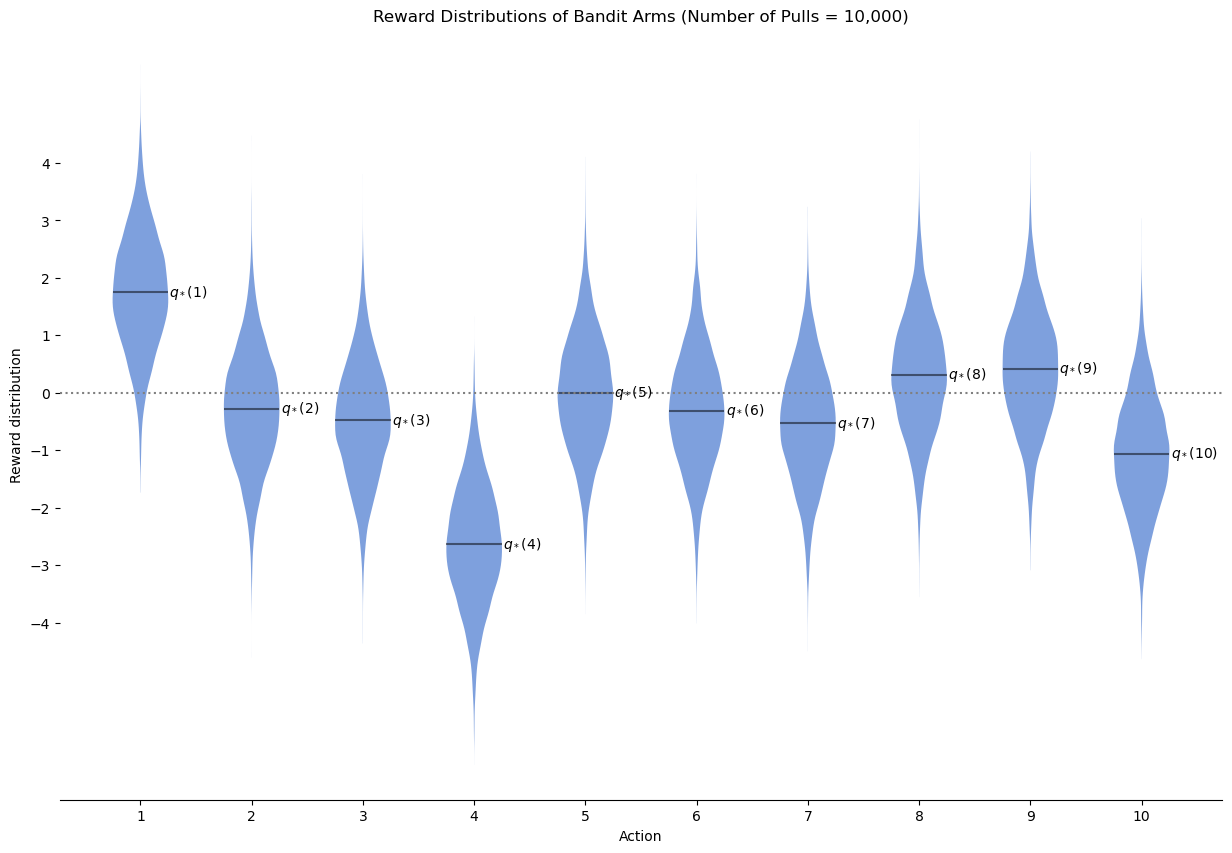

In [3]:
b_env = env.BanditEnv(k=10, random_state=11)
ut.plot_bandit_reward_distributions(b_env, save_path='./figs/q3_bandit_reward_distributions.png')

### Comparing Epsilon-Greedy $\epsilon$ Values

Skipping experiment, plots already exist.


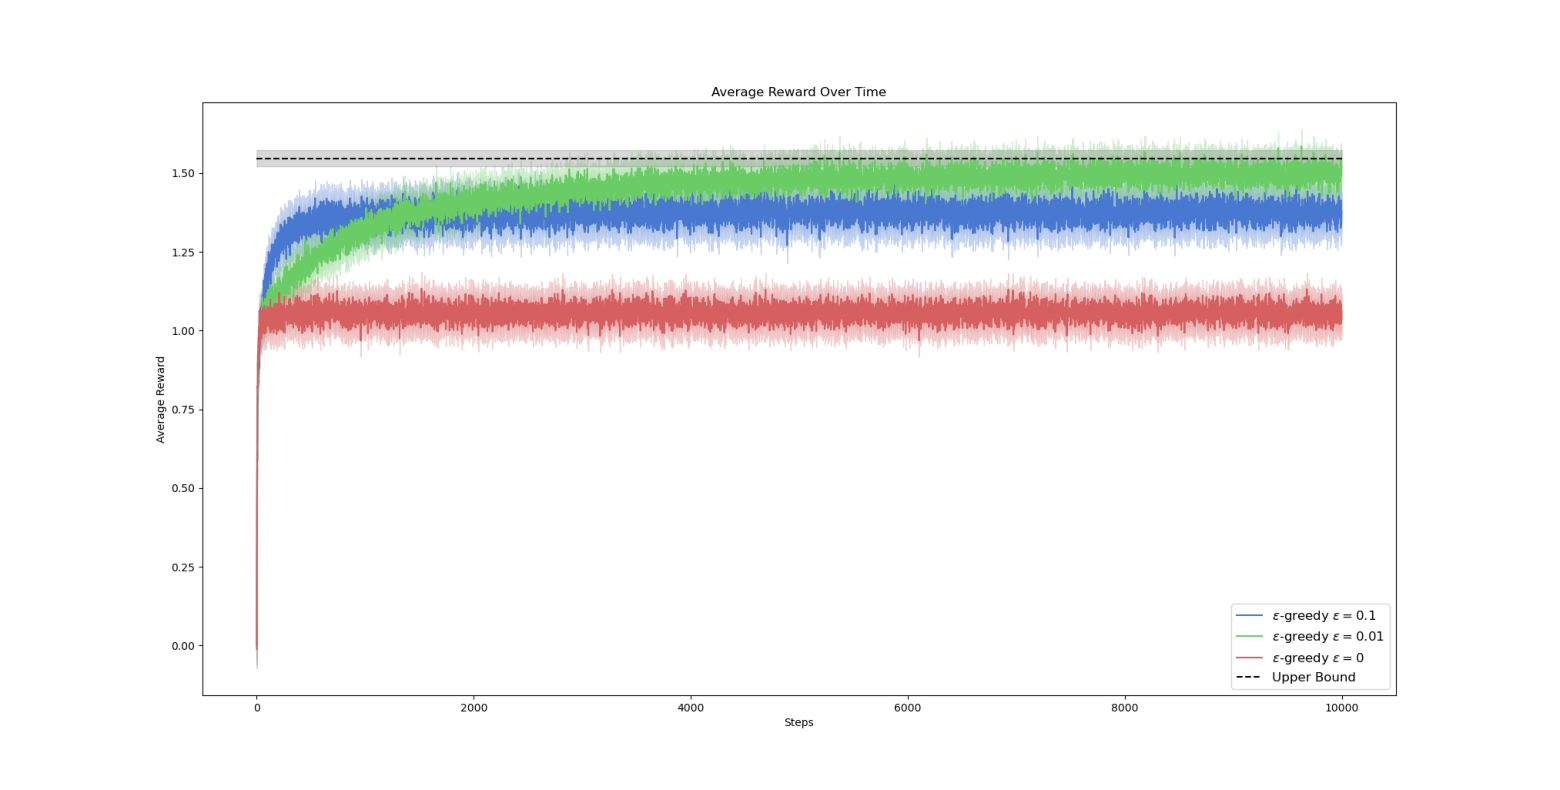

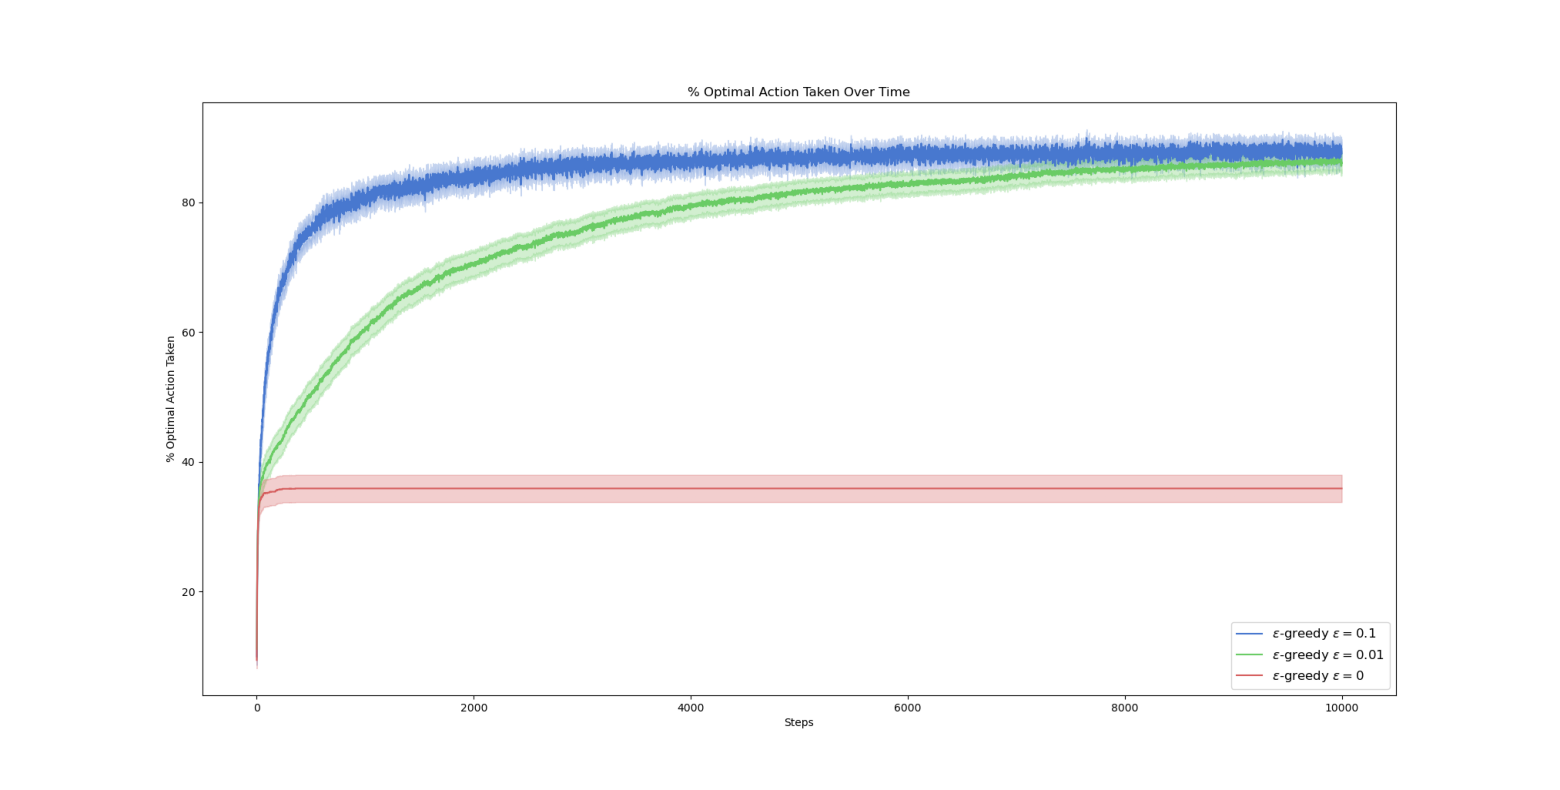

In [4]:
GREEDY_COMPARISON_REWARDS_PATH = './figs/q5_greedy_comparison_rewards.png'
GREEDY_COMPARISON_OPTIMAL_PATH = './figs/q5_greedy_comparison_optimal_action.png'

if not check_and_display_plots(GREEDY_COMPARISON_REWARDS_PATH, GREEDY_COMPARISON_OPTIMAL_PATH):
    agents_1 = [EpsilonGreedy(10, 0, 0.1), EpsilonGreedy(10, 0, 0.01), EpsilonGreedy(10, 0, 0)]
    labels = [str(agent) for agent in agents_1]
    results_1 = ut.run_simulation(agents_1, b_env, n_steps, n_trials)
    ut.plot_average_reward(results_1['rewards'], labels, results_1['upper_bounds'], alpha=0.3, save_path='./figs/q5_greedy_comparison_rewards.png')
    ut.plot_optimal_action(results_1['took_optimal_action'], labels, alpha=0.3, save_path='./figs/q5_greedy_comparison_optimal_action.png')

### Comparing Upper Confidence Bound (UCB) Algorithm with Epsilon-Greedy

Skipping experiment, plots already exist.


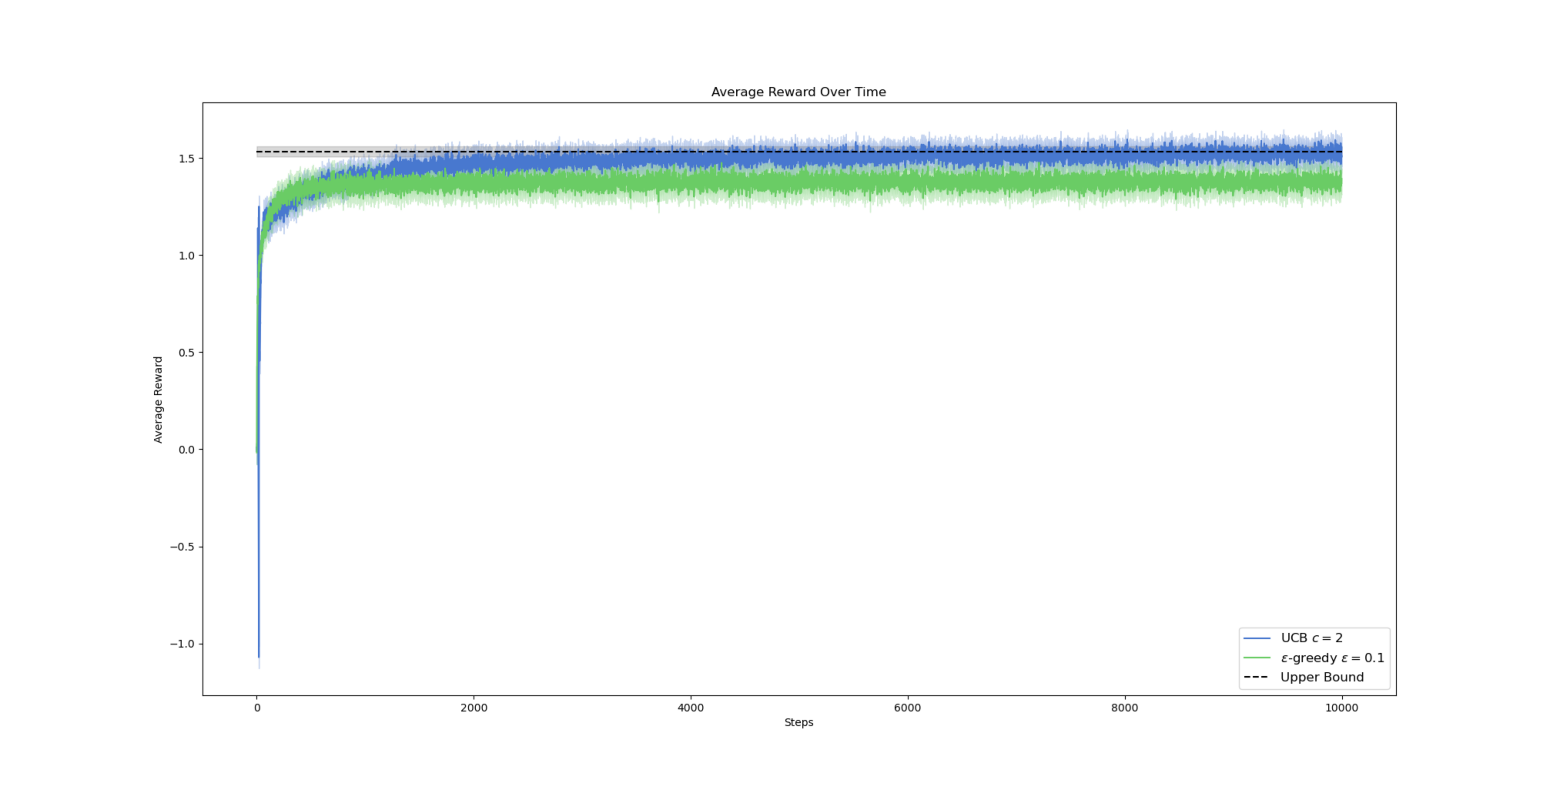

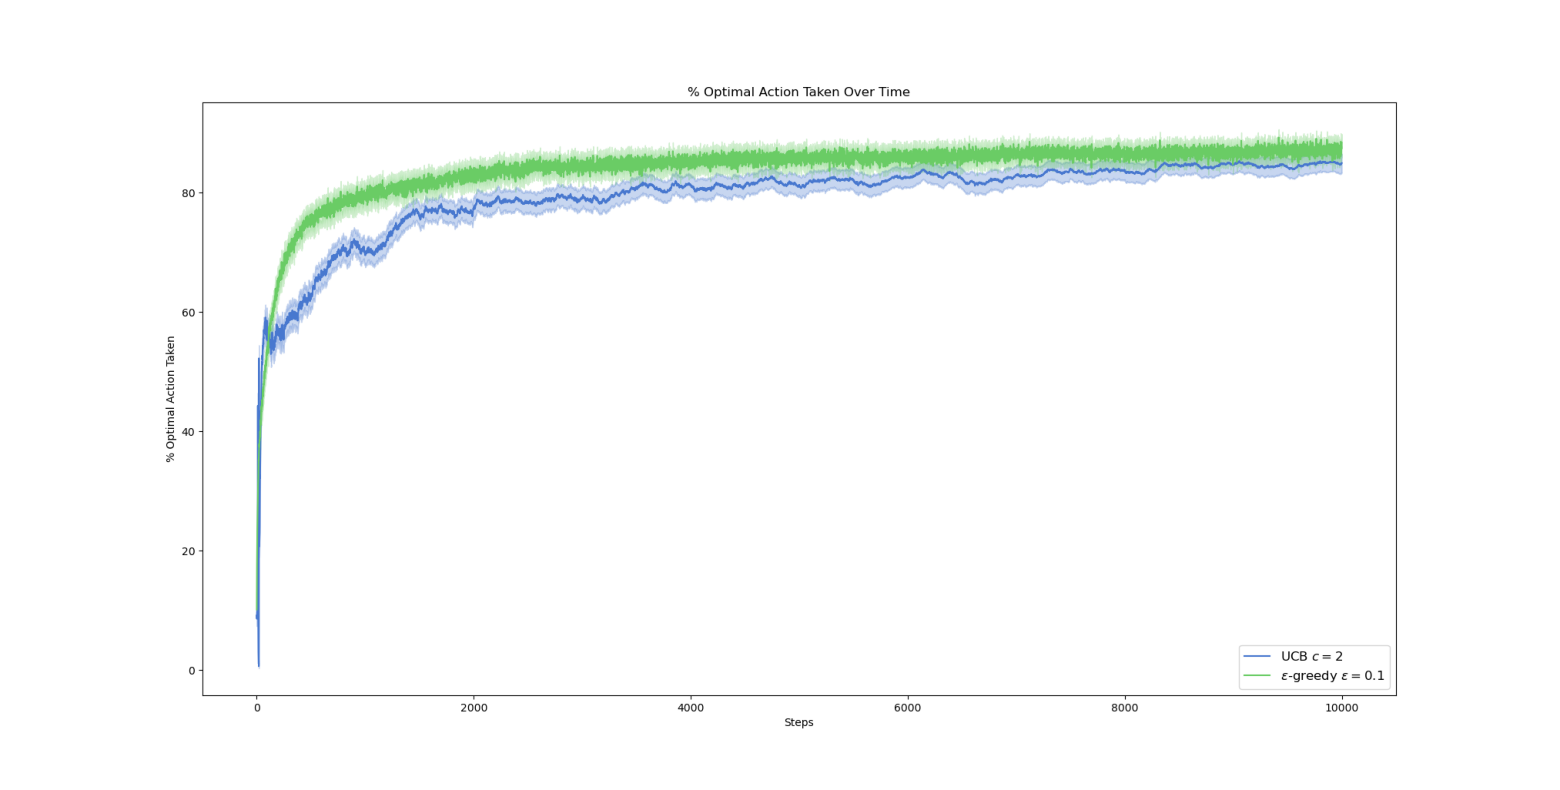

In [5]:
GREEDY_V_UCB_REWARD_PATH = './figs/q7_greedy_v_ucb_reward.png'
GREEDY_V_UCB_OPTIMAL_ACTION_PATH = './figs/q7_greedy_v_ucb_optimal_action.png'

if not check_and_display_plots(GREEDY_V_UCB_REWARD_PATH, GREEDY_V_UCB_OPTIMAL_ACTION_PATH):
    agents_p2 = [UCB(k=10, init=0, step_size=0.1, c=2), EpsilonGreedy(k=10, init=0, epsilon=0.1)]
    labels = [str(agent) for agent in agents_p2]
    results_2 = ut.run_simulation(agents_p2, b_env, n_steps, n_trials)
    ut.plot_average_reward(results_2['rewards'], labels, results_2['upper_bounds'], alpha=0.3, save_path='./figs/q7_greedy_v_ucb_reward.png')
    ut.plot_optimal_action(results_2['took_optimal_action'], labels, alpha=0.3, save_path='./figs/q7_greedy_v_ucb_optimal_action.png')

### Comparing Optimistic Initial Values And Epsilon-Greedy $\epsilon$ Values

Skipping experiment, plots already exist.


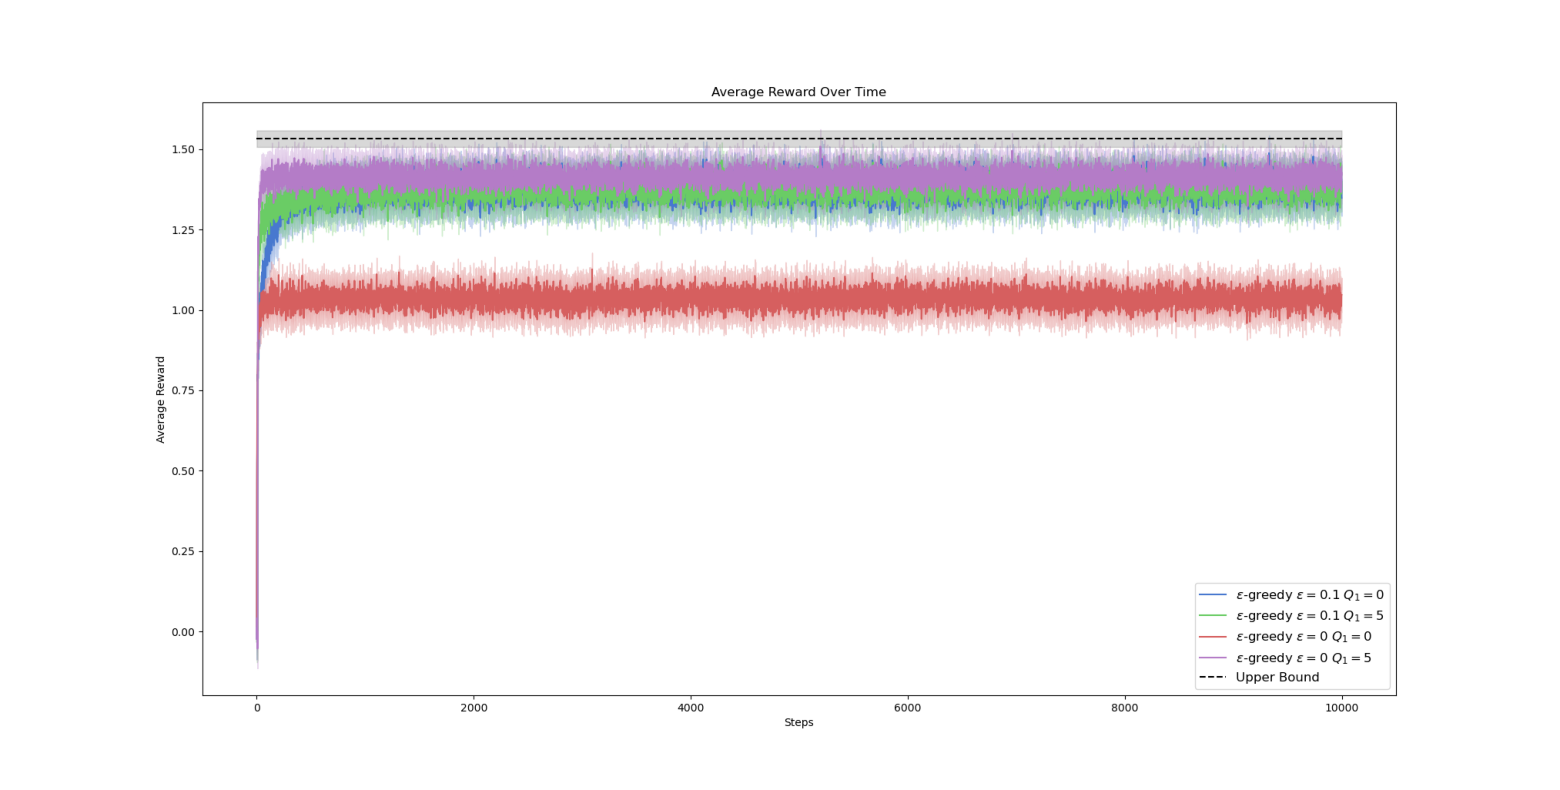

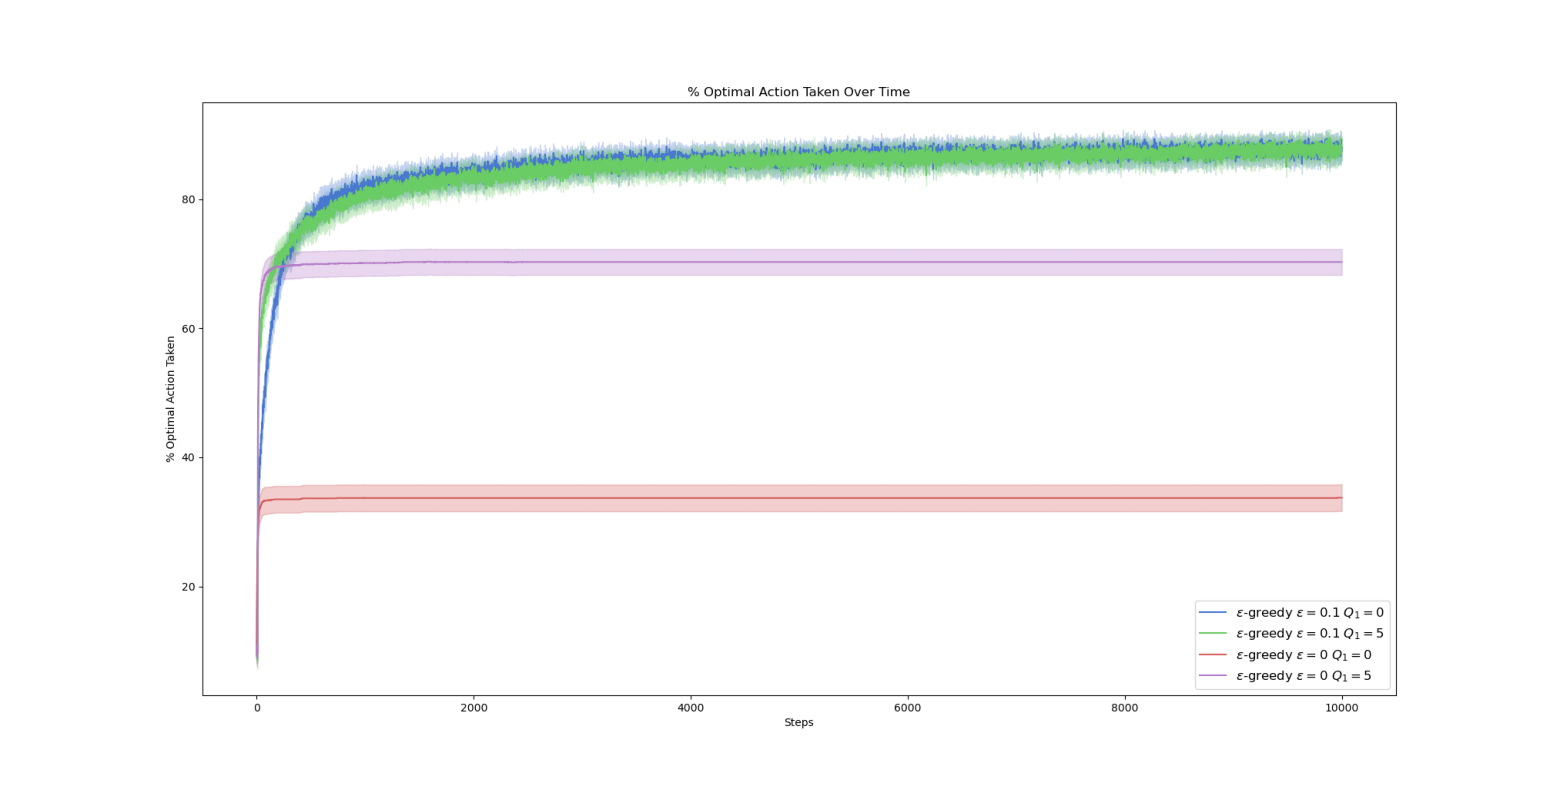

In [6]:
GREEDY_HYPERPARAMETER_TUNING_PATH = './figs/q7_greedy_hyperparameter_tuning_reward.png'
GREEDY_HYPERPARAMETER_TUNING_OPTIMAL_ACTION_PATH = './figs/q7_greedy_hyperparameter_tuning_optimal_action.png'

if not check_and_display_plots(GREEDY_HYPERPARAMETER_TUNING_PATH, GREEDY_HYPERPARAMETER_TUNING_OPTIMAL_ACTION_PATH):
    agents_p3 = []
    for e in [0.1, 0]:
        for init in [0, 5]:
            agents_p3.append(EpsilonGreedy(k=10, init=init, epsilon=e))
    labels = [str(agent) for agent in agents_p3]
    results_3 = ut.run_simulation(agents_p3, b_env, n_steps, n_trials)
    ut.plot_average_reward(results_3['rewards'], labels, results_3['upper_bounds'], alpha=0.3, save_path='./figs/q7_greedy_hyperparameter_tuning_reward.png')
    ut.plot_optimal_action(results_3['took_optimal_action'], labels, alpha=0.3, save_path='./figs/q7_greedy_hyperparameter_tuning_optimal_action.png')

### Non Stationary Environments

Testing the performance of the algorithms in non stationary environments. All arms are initialized with a mean of 0. At each step, each arm takes independent random walk with mean 0 and standard deviation 0.01.

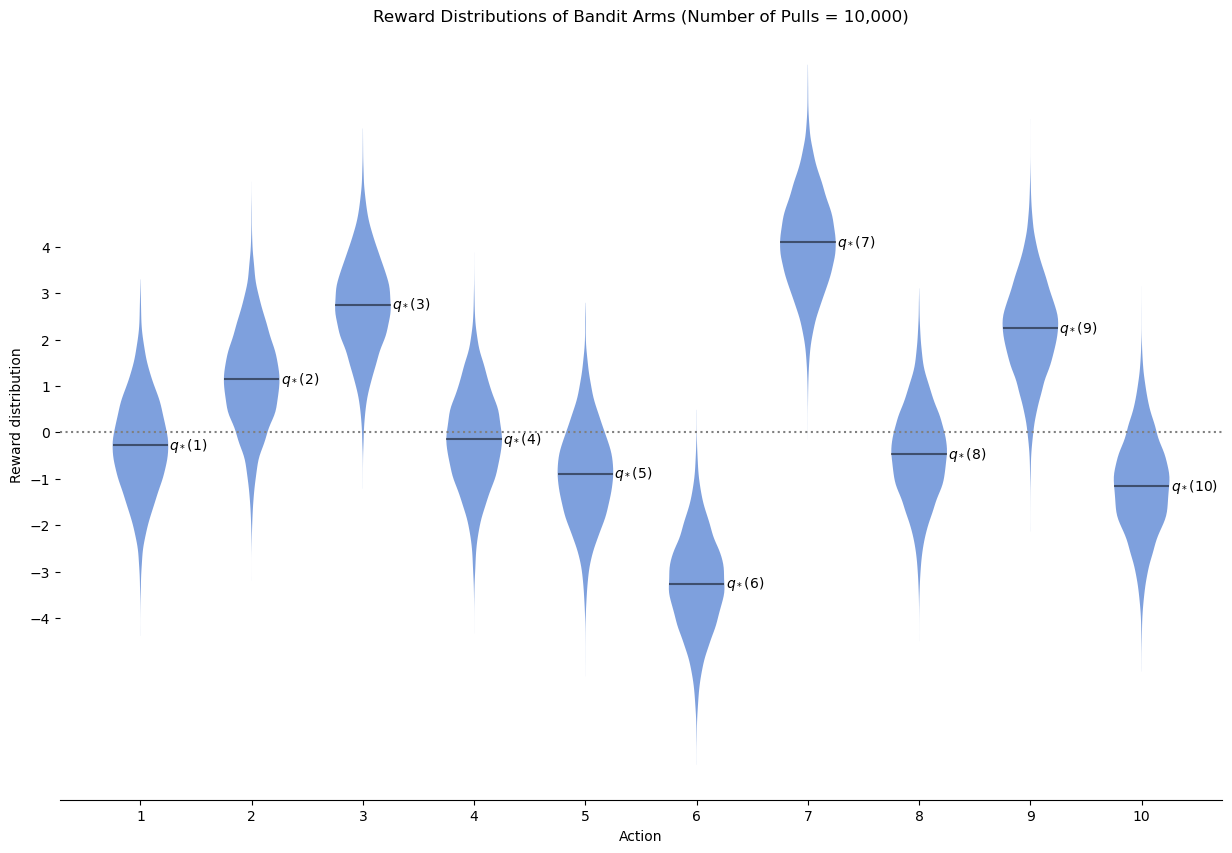

In [7]:
non_stationary_env = env.BanditEnv(k=10, random_state=11, stationary=False)
ut.plot_bandit_reward_distributions(non_stationary_env)

### Insight: Alot more variance in reward distributions for non stationary environments

Skipping experiment, plots already exist.


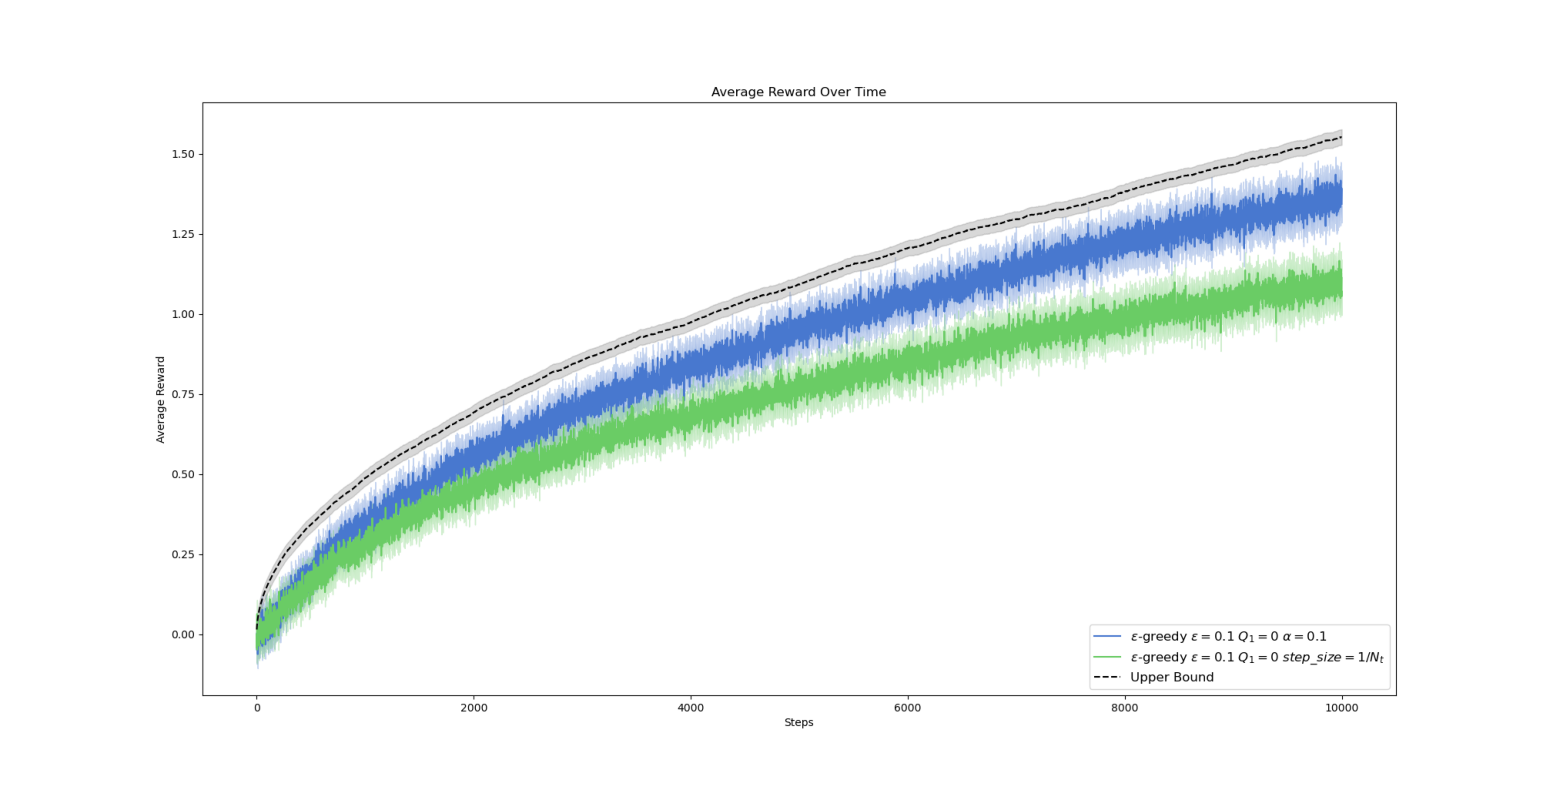

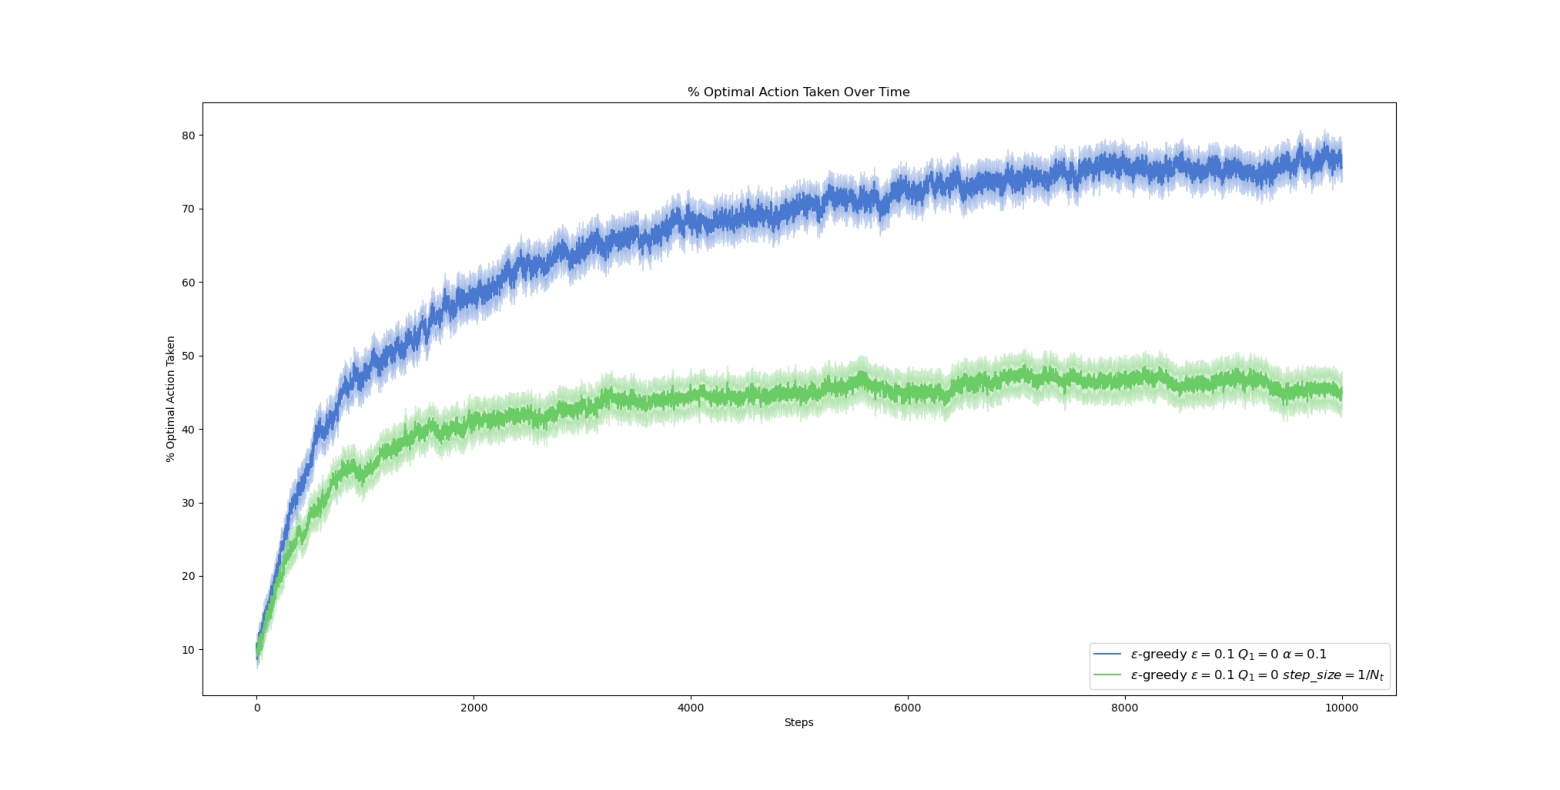

In [8]:
NONSTATIONARY_REWARD_PATH = './figs/q8_nonstationary_reward.png'
NONSTATIONARY_OPTIMAL_ACTION_PATH = './figs/q8_nonstationary_optimal_action.png'

if not check_and_display_plots(NONSTATIONARY_REWARD_PATH, NONSTATIONARY_OPTIMAL_ACTION_PATH):
    agents = [EpsilonGreedy(k=10, init=0, epsilon=0.1, step_size=0.1, verbose=True), EpsilonGreedy(k=10, init=0, epsilon=0.1, verbose=True)]
    labels = [str(agent) for agent in agents]
    print(labels)
    results = ut.run_simulation(agents, non_stationary_env, n_steps, n_trials, stationary=False)
    ut.plot_average_reward(results['rewards'], labels, results['upper_bounds'], alpha=0.3, save_path='./figs/q8_nonstationary_reward.png', stationary=False)
    ut.plot_optimal_action(results['took_optimal_action'], labels, alpha=0.3, save_path='./figs/q8_nonstationary_optimal_action.png')